# Libraries

In [1]:
import pandas as pd
import numpy as np
import time
from tqdm import tqdm
import matplotlib
import matplotlib.pyplot as plt

#libraries for preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#libraries for evaluation
from sklearn.metrics import mean_squared_log_error,r2_score,mean_squared_error
from sklearn.model_selection import train_test_split


#libraries for models
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV,RidgeCV

from sklearn.linear_model import Lasso

from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.ensemble import AdaBoostRegressor

import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading Dataframe

#df=pd.read_csv("vehiclesFinal2.csv")
df=pd.read_csv("vehiclesFinal.csv")
#df=df.drop('Unnamed: 0',axis=1)
df=df.drop('id',axis=1)

"""df=df.drop('lat',axis=1)
df=df.drop('long',axis=1)
df=df.drop('region',axis=1)"""

df2=df.copy()
df.head()

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long,price
0,prescott,2004.4,infiniti,g series,fair,5 cylinders,gas,20984.0,clean,automatic,4wd,full-size,offroad,grey,33.710686,-98.333734,6000
1,fayetteville,2004.4,infiniti,g series,fair,5 cylinders,gas,20984.0,clean,automatic,4wd,full-size,offroad,grey,33.710686,-98.333734,11900
2,florida keys,2004.4,infiniti,g series,fair,5 cylinders,gas,20984.0,clean,automatic,4wd,full-size,offroad,grey,33.710686,-98.333734,21000
3,worcester / central MA,2004.4,infiniti,g series,fair,5 cylinders,gas,20984.0,clean,automatic,4wd,full-size,offroad,grey,33.710686,-98.333734,1500
4,greensboro,2004.4,infiniti,g series,fair,5 cylinders,gas,20984.0,clean,automatic,4wd,full-size,offroad,grey,33.710686,-98.333734,4900


In [3]:
#defining numerical and categorical values

num_col=['year','odometer','long','lat']
cat_cols=['region','manufacturer','model','condition','cylinders','fuel','title_status','transmission','drive','size','type','paint_color']

# 1) Transforming categorical columns values into integer values

In [4]:
le=preprocessing.LabelEncoder()
df[cat_cols]=df[cat_cols].apply(le.fit_transform)

In [5]:
df.head(2)

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long,price
0,277,2004.4,17,12953,1,4,2,20984.0,0,0,0,1,6,5,33.710686,-98.333734,6000
1,105,2004.4,17,12953,1,4,2,20984.0,0,0,0,1,6,5,33.710686,-98.333734,11900


# 2) Scaling Dataset

In [6]:
#scaling numerical data

norm = StandardScaler()
df['price'] = np.log(df['price'])
df['odometer'] = norm.fit_transform(np.array(df['odometer']).reshape(-1,1))
df['year'] = norm.fit_transform(np.array(df['year']).reshape(-1,1))
df['model'] = norm.fit_transform(np.array(df['model']).reshape(-1,1))

#scaling target variable
q1,q3=(df['price'].quantile([0.25,0.75]))
o1=q1-1.5*(q3-q1)
o2=q3+1.5*(q3-q1)
df=df[(df.price>=o1) & (df.price<=o2)]

df['region'] = norm.fit_transform(np.array(df['region']).reshape(-1,1))
df['lat'] = norm.fit_transform(np.array(df['lat']).reshape(-1,1))
df['long'] = norm.fit_transform(np.array(df['long']).reshape(-1,1))

In [7]:
df.head(2)

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long,price
0,0.702942,-1.473996,17,-0.024526,1,4,2,-1.1586,0,0,0,1,6,5,-0.821601,-0.229271,8.699515
1,-0.751849,-1.473996,17,-0.024526,1,4,2,-1.1586,0,0,0,1,6,5,-0.821601,-0.229271,9.384294


In [8]:
#function to split dataset int training and test
def trainingData(df,n):
    X = df.iloc[:,n]
    y = df.iloc[:,-1:].values.T
    y=y[0]
    X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.9,test_size=0.1,random_state=0)
    return (X_train,X_test,y_train,y_test)

X_train,X_test,y_train,y_test=trainingData(df,list(range(len(list(df.columns))-1)))

In [34]:
X_train

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long
330716,1.531834,-3.184539,17,-1.571753,3,6,2,-0.798214,0,1,1,1,2,8,1.007812,1.177748
116827,1.235801,0.272940,13,0.989368,1,4,2,-0.061597,0,0,0,1,10,5,1.578948,-1.260489
309865,-1.631490,-0.272977,33,0.603697,1,4,2,0.237355,0,0,2,1,10,4,-1.045767,-0.254946
112306,-1.360831,-1.728758,16,-0.506029,1,4,2,0.233050,0,1,0,1,6,5,0.879653,-1.223209
308389,0.305412,0.818858,18,1.600054,2,4,0,-1.155064,0,2,2,1,9,0,-0.400203,0.411235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363510,1.591041,1.000831,24,0.476862,2,4,2,-1.332442,0,2,2,1,7,10,1.105943,0.252685
361795,0.186999,0.454913,12,-0.220102,2,5,2,-0.432705,0,2,0,1,8,1,0.780383,0.345819
153665,0.077044,-0.272977,12,-0.169838,1,6,0,-0.045227,0,0,0,1,6,5,0.741932,1.280856
119074,-1.166295,0.818858,5,-0.493658,2,4,2,-1.230707,0,2,1,1,7,9,0.569625,0.361342


In [9]:
#some of models will predict neg values so this function will remove that values
def remove_neg(y_test,y_pred):
    ind=[index for index in range(len(y_pred)) if(y_pred[index]>0)]
    y_pred=y_pred[ind]
    y_test=y_test[ind]
    y_pred[y_pred<0]
    return (y_test,y_pred)

#function for evaluation of model
def result(y_test,y_pred):
    r=[]
    r.append(mean_squared_log_error(y_test, y_pred))
    r.append(np.sqrt(r[0]))
    r.append(r2_score(y_test,y_pred))
    r.append(round(r2_score(y_test,y_pred)*100,4))
    return (r)

#dataframe that store the performance of each model
accu=pd.DataFrame(index=['MSLE', 'Root MSLE', 'R2 Score','Accuracy(%)'])    

# 3) Model Implementation
### 1)Linear Regression
### 2)Ridge Regression
### 3)Lasso Regression
### 4)K-Neighbors Regressor
### 5)Random Forest Regressor
### 6)Bagging Regressor
### 7)Adaboost Regressor
### 8)XGBoost

## 1) Linear Regression

In [10]:
#fitting model
LR=LinearRegression()
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)

In [11]:
#calculating error/accuracy
y_test_1,y_pred_1=remove_neg(y_test,y_pred)
r1_lr=result(y_test_1,y_pred_1)
print('Coefficients: \n', LR.coef_)
print("MSLE : {}".format(r1_lr[0]))
print("Root MSLE : {}".format(r1_lr[1]))
print("R2 Score : {} or {}%".format(r1_lr[2],r1_lr[3]))
accu['Linear Regression']=r1_lr

Coefficients: 
 [-0.00100736  0.42681034 -0.00075624 -0.00263924 -0.02326722  0.20173939
 -0.15465521 -0.2464553  -0.09123397  0.07052097 -0.08624364 -0.03520831
  0.0021679   0.00493178 -0.00049051 -0.06838886]
MSLE : 0.0024161658796354245
Root MSLE : 0.04915451026747621
R2 Score : 0.6255645515131343 or 62.5565%


## 2) Ridge regression

In [12]:
#model object and fitting model
RR=Ridge(alpha=25,solver='auto')
RR.fit(X_train,y_train)
y_pred=RR.predict(X_test)

In [13]:
#model evaluation

y_test_2,y_pred_2=remove_neg(y_test,y_pred)
r2_ridge=result(y_test_2,y_pred_2)
print("MSLE : {}".format(r2_ridge[0]))
print("Root MSLE : {}".format(r2_ridge[1]))
print("R2 Score : {} or {}%".format(r2_ridge[2],r2_ridge[3]))
accu['Ridge Regression']=r2_ridge

MSLE : 0.002416160158910664
Root MSLE : 0.04915445207619208
R2 Score : 0.625565465229311 or 62.5565%


## 3) Lasso Regression

In [14]:
#model object and fitting it
lasso=Lasso(alpha=0.0001)
lasso.fit(X_train,y_train)
y_pred=lasso.predict(X_test)

In [15]:
#model evaluation
y_test_3,y_pred_3=remove_neg(y_test,y_pred)
r3_lasso=result(y_test_3,y_pred_3)
print("MSLE : {}".format(r3_lasso[0]))
print("Root MSLE : {}".format(r3_lasso[1]))
print("R2 Score : {} or {}%".format(r3_lasso[2],r3_lasso[3]))
accu['Lasso Regression']=r3_lasso

MSLE : 0.002416119869132121
Root MSLE : 0.0491540422461075
R2 Score : 0.6255752923578952 or 62.5575%


## 4) KNN

In [16]:
#estimating MSLE for k=1-9
R_MSLE=[]
for i in range(1,10):
    KNN=KNeighborsRegressor(n_neighbors=i)
    KNN.fit(X_train,y_train)
    y_pred=KNN.predict(X_test)
    error=np.sqrt(mean_squared_log_error(y_test, y_pred))
    R_MSLE.append(error)
    print("K =",i," , Root MSLE =",error)

K = 1  , Root MSLE = 0.03824099199827251
K = 2  , Root MSLE = 0.0352890830517743
K = 3  , Root MSLE = 0.03472675091526727
K = 4  , Root MSLE = 0.034730324143332617
K = 5  , Root MSLE = 0.03499063665571354
K = 6  , Root MSLE = 0.03517595950708417
K = 7  , Root MSLE = 0.03530427551760089
K = 8  , Root MSLE = 0.03550307011781226
K = 9  , Root MSLE = 0.03574420078981347


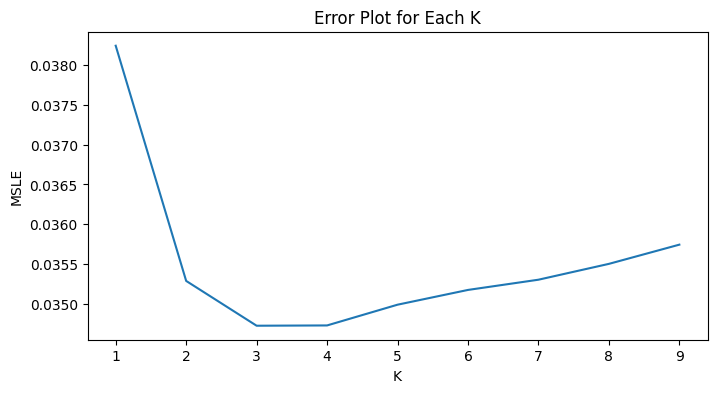

In [17]:
#plotting error

curve = pd.DataFrame(R_MSLE) #elbow curve 
plt.figure(figsize=(8,4))
plt.xticks(list(range(1,10)), list(range(1,10)), rotation='horizontal')
plt.plot(list(range(1,10)),R_MSLE)
plt.xlabel('K')
plt.ylabel('MSLE')
plt.title('Error Plot for Each K')
plt.savefig('KNN-Error-Plot.jpg')
plt.show()

In [18]:
#model implementation
KNN=KNeighborsRegressor(n_neighbors=) 
KNN.fit(X_train,y_train)
y_pred=KNN.predict(X_test)

SyntaxError: invalid syntax (956116529.py, line 2)

In [19]:
#model evaluation
r4_knn=result(y_test,y_pred)
print("MSLE : {}".format(r4_knn[0]))
print("Root MSLE : {}".format(r4_knn[1]))
print("R2 Score : {} or {}%".format(r4_knn[2],r4_knn[3]))
accu['KNN']=r4_knn

MSLE : 0.0012776478901025017
Root MSLE : 0.03574420078981347
R2 Score : 0.8092698745814237 or 80.927%


In [20]:
accu.to_csv('errors.csv')

### 5) Random Forest

In [21]:
RFR = RandomForestRegressor(n_estimators=180,random_state=0, min_samples_leaf=1, max_features=0.5, n_jobs=-1, oob_score=True)
RFR.fit(X_train,y_train)
y_pred = RFR.predict(X_test)

In [22]:
r5_rf=result(y_test,y_pred)
print("MSLE : {}".format(r5_rf[0]))
print("Root MSLE : {}".format(r5_rf[1]))
print("R2 Score : {} or {}%".format(r5_rf[2],r5_rf[3]))
accu['RandomForest Regressor']=r5_rf

MSLE : 0.0006111121502414481
Root MSLE : 0.024720682641089183
R2 Score : 0.911833866633981 or 91.1834%


### 6) Bagging Regressor

In [23]:
#model implementation
baggReg=BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=20),n_estimators=50, random_state=1,
                         max_samples=1.0, max_features=1.0, bootstrap=False, 
                         bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=-1, verbose=0)
baggReg.fit(X_train,y_train)
y_pred=baggReg.predict(X_test)

In [24]:
#model evaluation
r6_br=result(y_test,y_pred)
print("MSLE : {}".format(r6_br[0]))
print("Root MSLE : {}".format(r6_br[1]))
print("R2 Score : {} or {}%".format(r6_br[2],r6_br[3]))

MSLE : 0.0011778460680167313
Root MSLE : 0.03431976206235602
R2 Score : 0.8267549907211298 or 82.6755%


In [25]:
accu['Bagging Regressor']=r6_br
accu.to_csv('errors.csv')

### 7) Adaboost

In [26]:
#model implementation
ABR = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=24),
    n_estimators=200,learning_rate=0.6
)

ABR.fit(X_train, y_train)
y_pred = ABR.predict(X_test)

In [27]:
#model evaluation
r7_ab=result(y_test,y_pred)
print("MSLE : {}".format(r7_ab[0]))
print("Root MSLE : {}".format(r7_ab[1]))
print("R2 Score : {} or {}%".format(r7_ab[2],r7_ab[3]))

MSLE : 0.0006445313262187801
Root MSLE : 0.025387621515588658
R2 Score : 0.9056353347196432 or 90.5635%


In [28]:
accu['AdaBoost Regressor']=r7_ab
accu.to_csv('errors.csv')

### 8) XGBOOST

In [29]:
#model implementation and fitting data
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.4,
                max_depth = 24, alpha = 5, n_estimators = 200)
xg_reg.fit(X_train,y_train)
y_pred = xg_reg.predict(X_test)

In [30]:
#model evaluation
y_test_1,y_pred_1=remove_neg(y_test,y_pred)
r8_xg=result(y_test_1,y_pred_1)
print("MSLE : {}".format(r8_xg[0]))
print("Root MSLE : {}".format(r8_xg[1]))
print("R2 Score : {} or {}%".format(r8_xg[2],r8_xg[3]))

MSLE : 0.0005127977046599476
Root MSLE : 0.022645037086742596
R2 Score : 0.9258113573746312 or 92.5811%


In [31]:
accu['XGBoost Regressor']=r8_xg
accu.to_csv('errors.csv')

# Overall Result

In [32]:
accu=pd.read_csv('./errors.csv',index_col=0)
accu

,Linear Regression,Ridge Regression,Lasso Regression,KNN,RandomForest Regressor,Bagging Regressor,AdaBoost Regressor,XGBoost Regressor
MSLE,0.002416,0.002416,0.002416,0.001278,0.000611,0.001178,0.000645,0.000513
Root MSLE,0.049155,0.049154,0.049154,0.035744,0.024721,0.034320,0.025388,0.022645
R2 Score,0.625565,0.625565,0.625575,0.809270,0.911834,0.826755,0.905635,0.925811
Accuracy(%),62.556500,62.556500,62.557500,80.927000,91.183400,82.675500,90.563500,92.581100


In [33]:
import pickle

with open("xg_reg.pkl","wb") as file:
    pickle.dump(xg_reg,file)